In [1]:
import tensorflow as tf

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import cv2
import numpy as np

    
# To plot output of layers.
def plot_layer_output(model, layer_i, x_batch, y_batch, img_idx=0, rows=6, cols=6):
    layer = tf.keras.Model(inputs=model.layers[1].input, outputs=model.layers[layer_i].output)
    layer_visual = layer.predict(x_batch)
    print(layer_visual.shape)

    plt.figure(1, figsize=(20, 15))
    for i in range(layer_visual.shape[3]):
        
        if i > (rows*cols) - 1:
            break
            
        plt.subplot(rows, cols, i+1)
        img = layer_visual[img_idx, :, :, i]
        plt.imshow(img, cmap="jet")
#         plt.title(str(y_batch[i]))
        plt.axis("off")
        
        plt.colorbar()
        
def plot_histories(history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history[0][3:])
    plt.plot(history[2][3:])
    plt.legend(["training", "validation"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss plot")

    plt.subplot(1, 2, 2)
    plt.plot(history[1])
    plt.plot(history[3])
    plt.legend(["training", "validation"])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy plot")


Found 7195 images belonging to 3 classes.


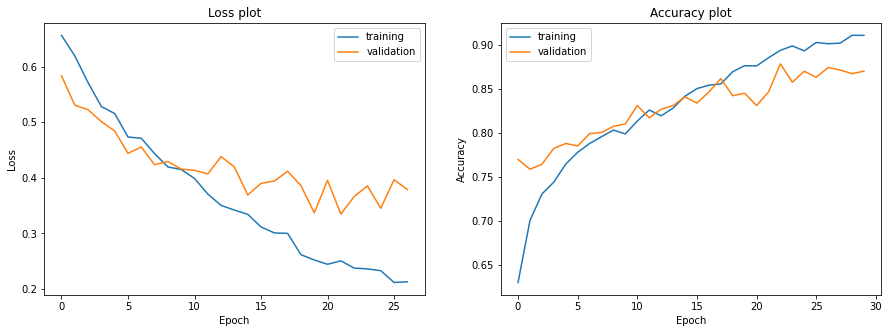

In [2]:
MODELS = ["forward", "left", "right"]  # Also represents the class names.
MODEL_I = 0  # Model index, determines which module to analyse, chosen from MODELS.

MODEL_TO_LOAD = "br_org_paddingSame_resized_cropped"

DATA_PATH = f"data/{MODELS[MODEL_I]}_model_data"

BATCH_SIZE = 32

IMGS_SHAPE = (240, 320, 3)


img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data_flow = img_gen.flow_from_directory(directory=DATA_PATH,
                                              target_size=(IMGS_SHAPE[0], IMGS_SHAPE[1]),
                                              batch_size=BATCH_SIZE)
x_sample_batch = train_data_flow.next()[0]
y_sample_batch = train_data_flow.next()[1]

model = load_model(f"saved_models/model_{MODELS[MODEL_I]}_{MODEL_TO_LOAD}.h5")
# model.summary()

with open(f"saved_models/history_{MODELS[MODEL_I]}_{MODEL_TO_LOAD}.npy", "rb") as file:
    history = np.load(file)


plot_histories(history)

(32, 118, 158, 24)


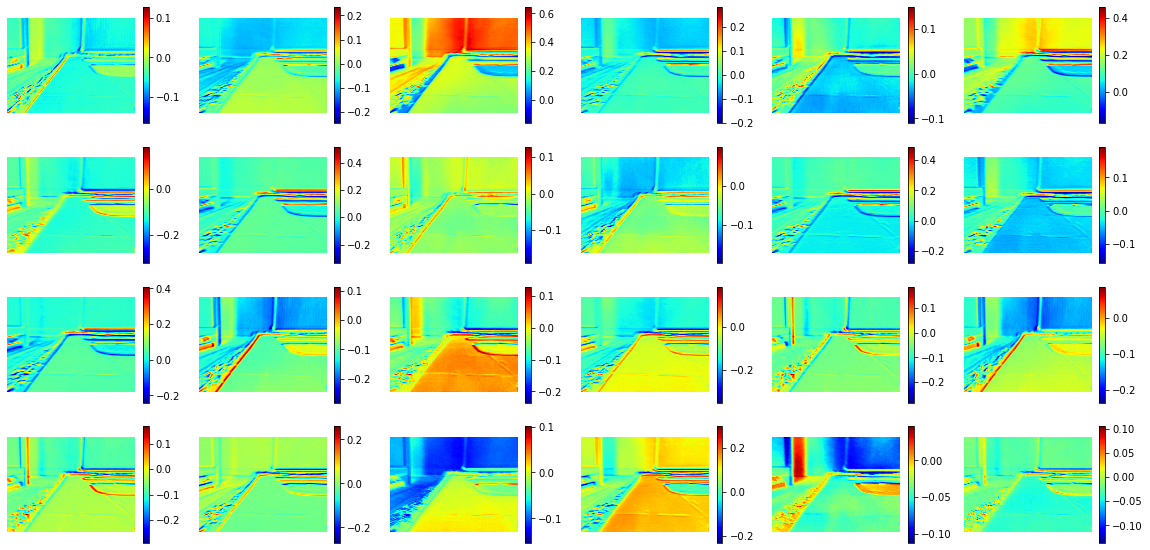

In [3]:
img_idx = 0

plot_layer_output(model, 1, x_sample_batch, y_sample_batch, img_idx=img_idx)

(32, 59, 79, 24)


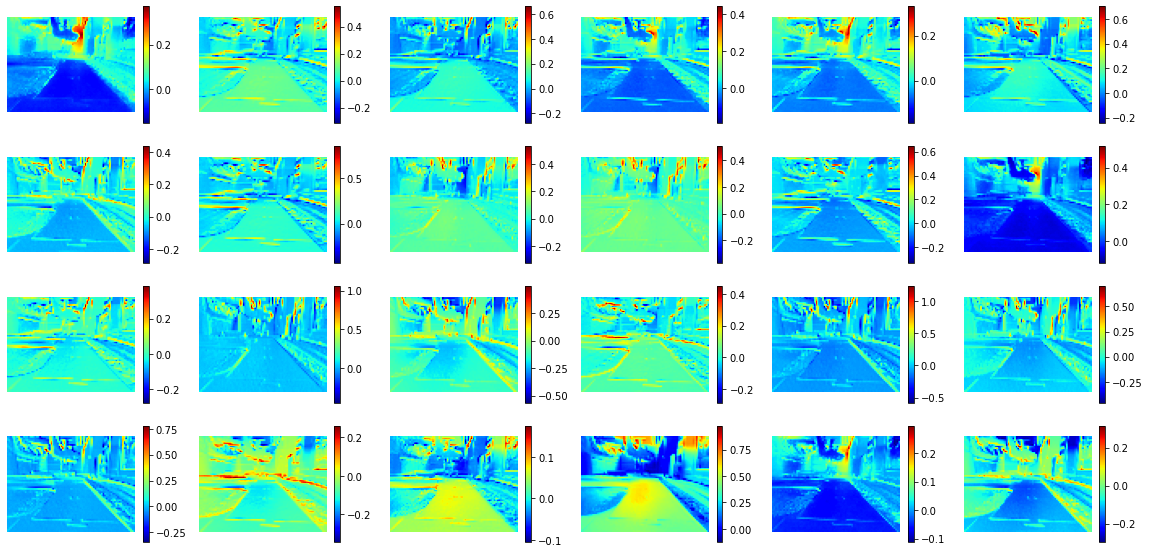

In [4]:
plot_layer_output(model, 2, x_sample_batch, y_sample_batch, img_idx=img_idx)

(32, 55, 75, 36)


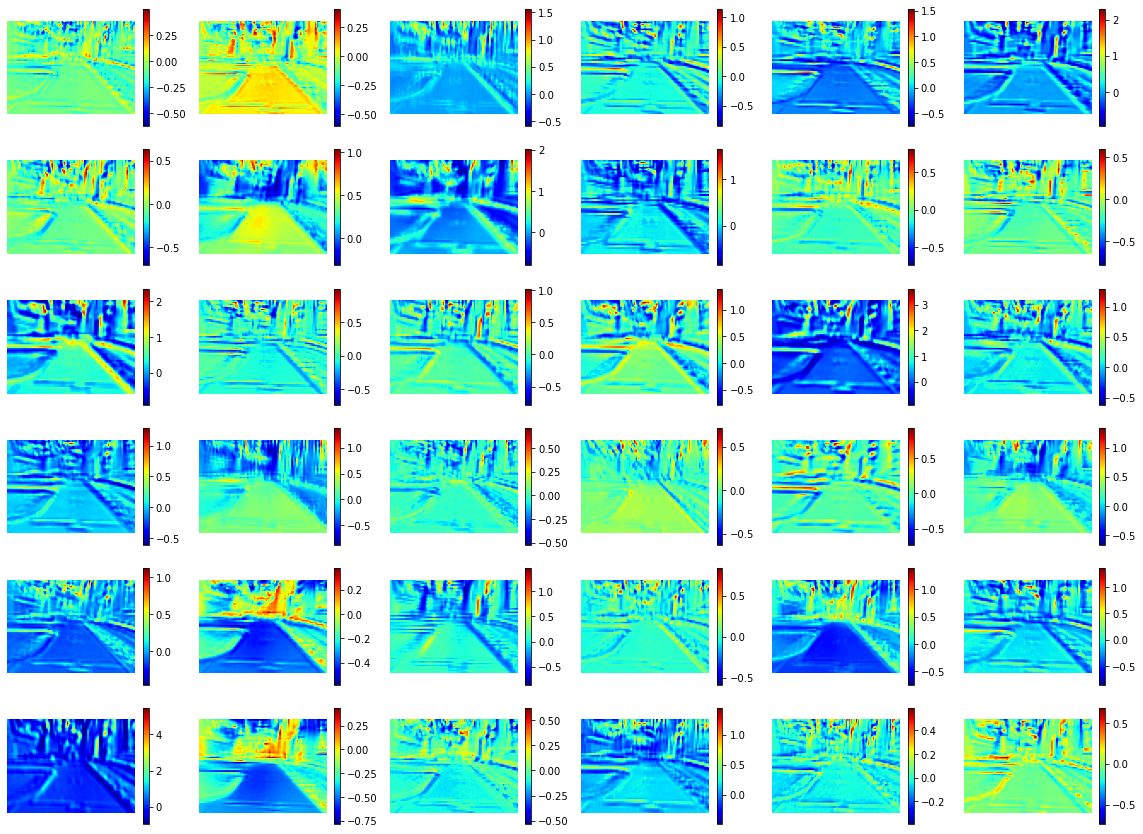

In [5]:
plot_layer_output(model, 3, x_sample_batch, y_sample_batch, img_idx=img_idx)

(32, 28, 38, 36)


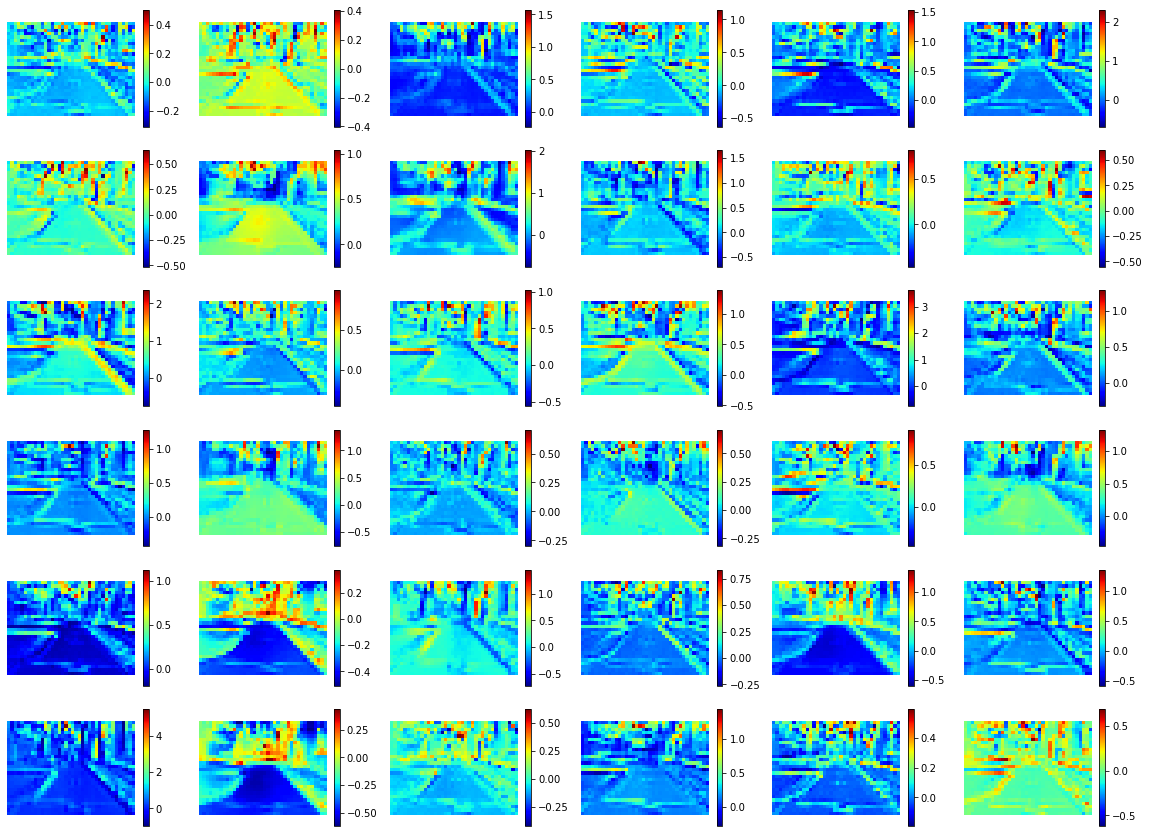

In [6]:
plot_layer_output(model, 4, x_sample_batch, y_sample_batch, img_idx=img_idx)

(32, 28, 38, 48)


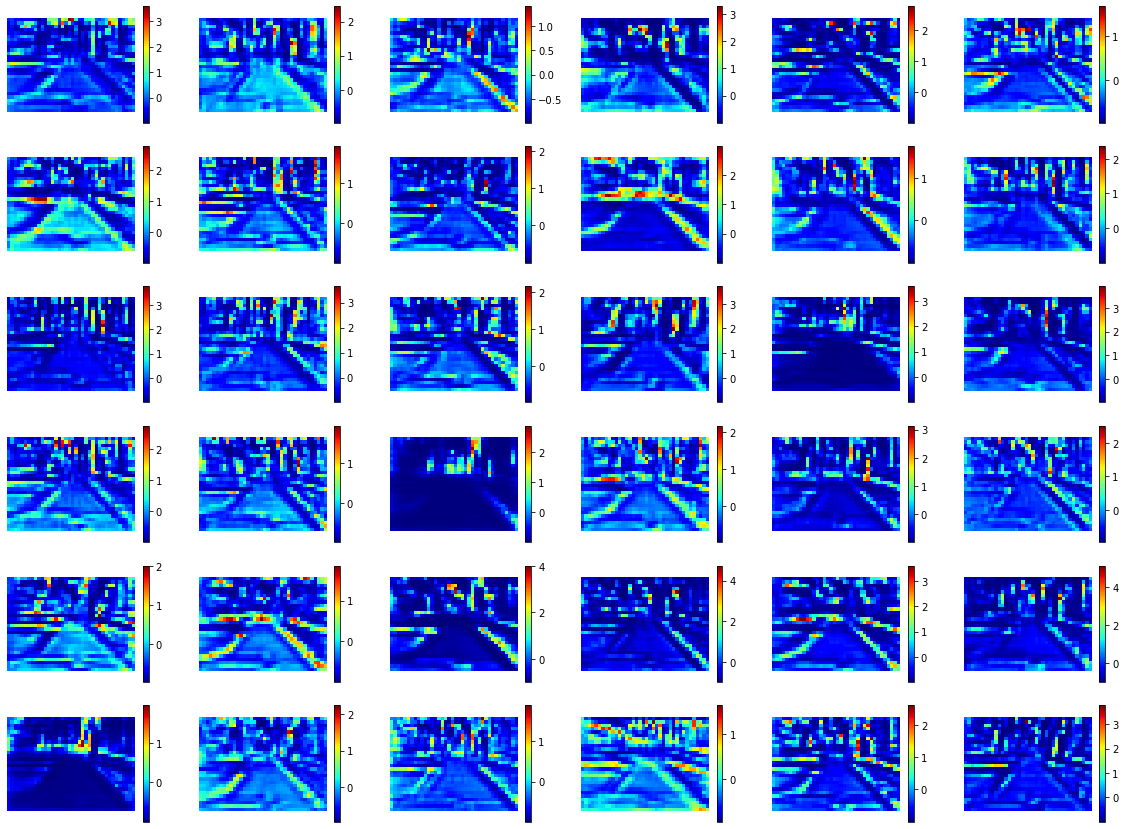

In [7]:
plot_layer_output(model, 5, x_sample_batch, y_sample_batch, img_idx=img_idx)

(32, 14, 19, 48)


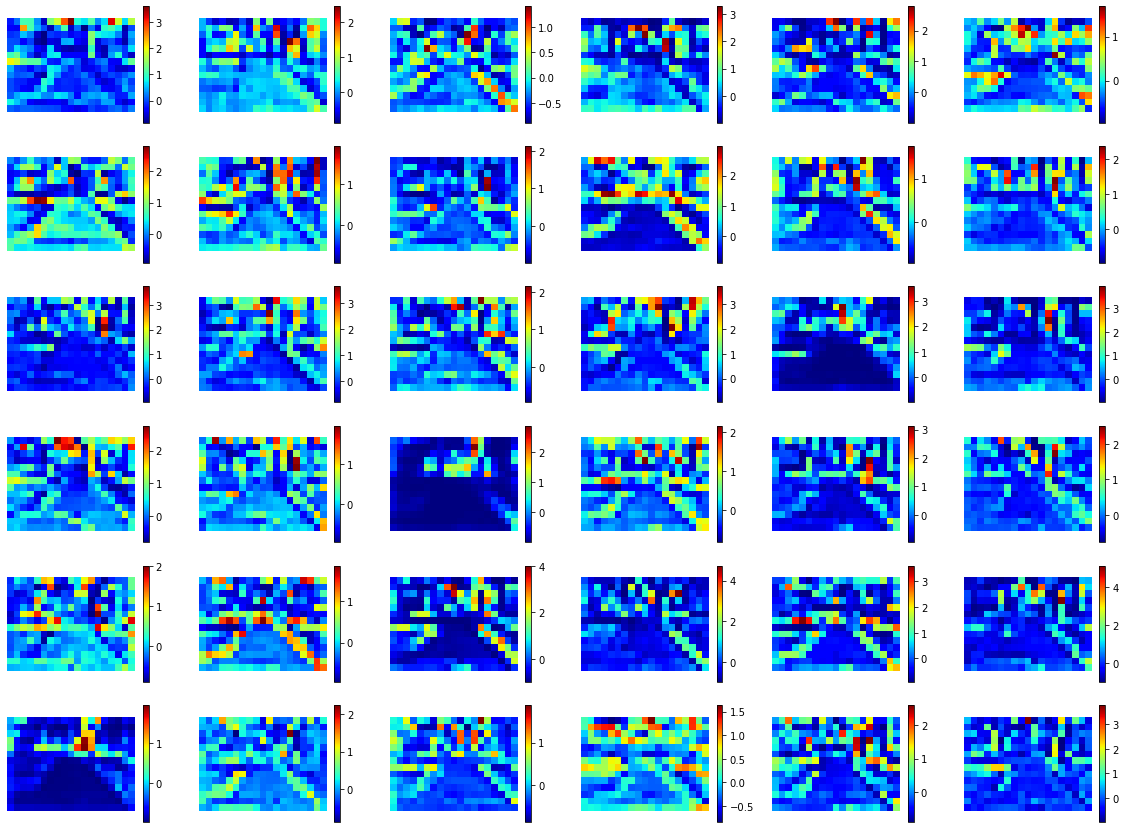

In [8]:
plot_layer_output(model, 6, x_sample_batch, y_sample_batch, img_idx=img_idx)

(32, 14, 19, 64)


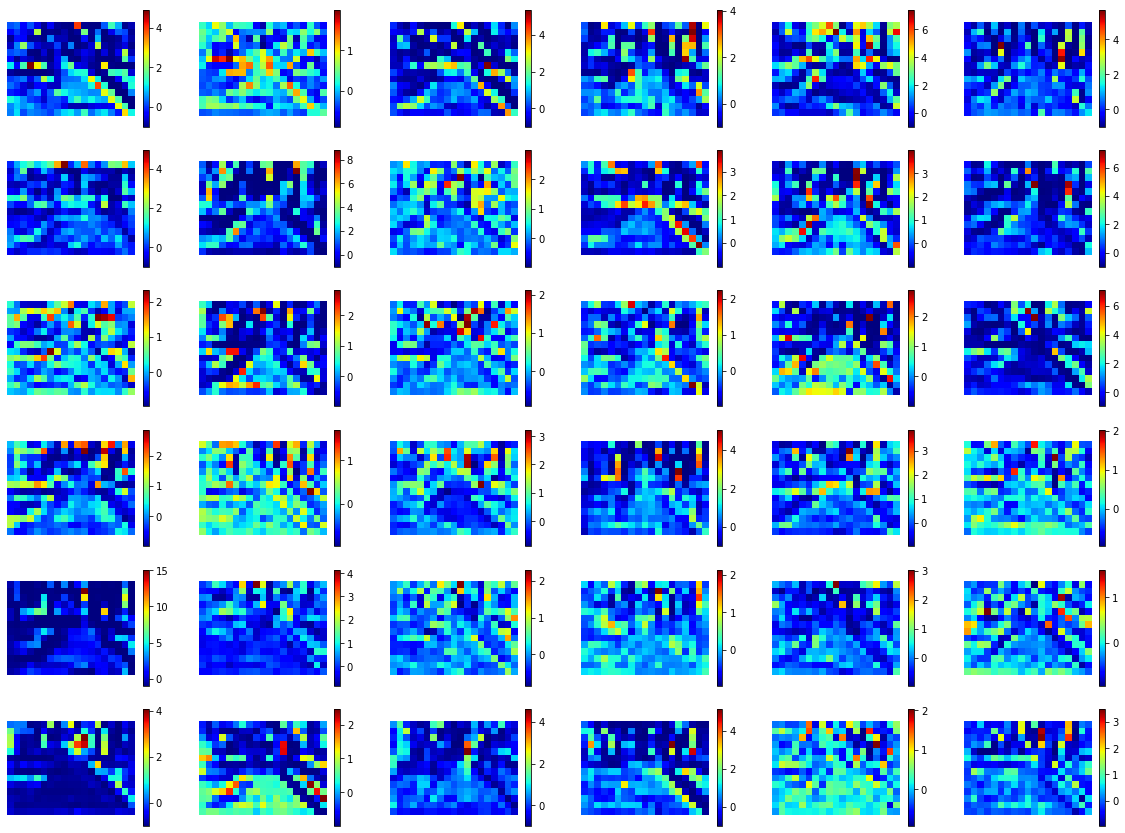

In [9]:
plot_layer_output(model, 7, x_sample_batch, y_sample_batch, img_idx=img_idx)